# Electronics and Telecommunication

Build a machine learning model which can help the company to predict the
equipment’s signal quality using various parameters.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import tensorflow as tf

In [2]:
tf.random.set_seed(0)
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv('Signal.csv')

In [4]:
data.head(10)

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   
5          7.4         0.66         0.00          1.8        0.075   
6          7.9         0.60         0.06          1.6        0.069   
7          7.3         0.65         0.00          1.2        0.065   
8          7.8         0.58         0.02          2.0        0.073   
9          7.5         0.50         0.36          6.1        0.071   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   
5         13.0         40.0       0.9978         3.51          0.56   
6         15.0         59.0       0.9964         3.30          0.46   
7         15.0         21.0       0.9946         3.39          0.47   
8          9.0         18.0       0.9968         3.36          0.57   
9         17.0        102.0       0.9978         3.35          0.80   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5  
5           9.4                5  
6           9.4                5  
7          10.0                7  
8           9.5                7  
9          10.5                5

In [5]:
data.tail(10)

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
1589          6.6        0.725         0.20          7.8        0.073   
1590          6.3        0.550         0.15          1.8        0.077   
1591          5.4        0.740         0.09          1.7        0.089   
1592          6.3        0.510         0.13          2.3        0.076   
1593          6.8        0.620         0.08          1.9        0.068   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
1589         29.0         79.0      0.99770         3.29          0.54   
1590         26.0         35.0      0.99314         3.32          0.82   
1591         16.0         26.0      0.99402         3.67          0.56   
1592         29.0         40.0      0.99574         3.42          0.75   
1593         28.0         38.0      0.99651         3.42          0.82   
1594         32.0         44.0      0.99490         3.45          0.58   
1595         39.0         51.0      0.99512         3.52          0.76   
1596         29.0         40.0      0.99574         3.42          0.75   
1597         32.0         44.0      0.99547         3.57          0.71   
1598         18.0         42.0      0.99549         3.39          0.66   

      Parameter 11  Signal_Strength  
1589           9.2                5  
1590          11.6                6  
1591          11.6                6  
1592          11.0                6  
1593           9.5                6  
1594          10.5                5  
1595          11.2                6  
1596          11.0                6  
1597          10.2                5  
1598          11.0                6

In [6]:
data.shape

(1599, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Observations:
1. There are total 1599 records and 12 columns.
2. All columns are numeric columns
3. Signal_Strength is the target column
4. There are no null values present in the dataset

In [8]:
data.describe().T

count       mean        std      min      25%       50%  \
Parameter 1      1599.0   8.319637   1.741096  4.60000   7.1000   7.90000   
Parameter 2      1599.0   0.527821   0.179060  0.12000   0.3900   0.52000   
Parameter 3      1599.0   0.270976   0.194801  0.00000   0.0900   0.26000   
Parameter 4      1599.0   2.538806   1.409928  0.90000   1.9000   2.20000   
Parameter 5      1599.0   0.087467   0.047065  0.01200   0.0700   0.07900   
Parameter 6      1599.0  15.874922  10.460157  1.00000   7.0000  14.00000   
Parameter 7      1599.0  46.467792  32.895324  6.00000  22.0000  38.00000   
Parameter 8      1599.0   0.996747   0.001887  0.99007   0.9956   0.99675   
Parameter 9      1599.0   3.311113   0.154386  2.74000   3.2100   3.31000   
Parameter 10     1599.0   0.658149   0.169507  0.33000   0.5500   0.62000   
Parameter 11     1599.0  10.422983   1.065668  8.40000   9.5000  10.20000   
Signal_Strength  1599.0   5.636023   0.807569  3.00000   5.0000   6.00000   

                       75%        max  
Parameter 1       9.200000   15.90000  
Parameter 2       0.640000    1.58000  
Parameter 3       0.420000    1.00000  
Parameter 4       2.600000   15.50000  
Parameter 5       0.090000    0.61100  
Parameter 6      21.000000   72.00000  
Parameter 7      62.000000  289.00000  
Parameter 8       0.997835    1.00369  
Parameter 9       3.400000    4.01000  
Parameter 10      0.730000    2.00000  
Parameter 11     11.100000   14.90000  
Signal_Strength   6.000000    8.00000

#### Observations:
1. In most of the columns, we can see big difference between 50% and max value, hence we conclude there are lot of outliers present in the dataset.
2. Based on the mean and 50%, we can observe, most of columns are right skewed.
3. Parameter 3 is having values between 0 and 1, we need observe data present in it whether we can derive something from this.

In [9]:
data.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [10]:
data[data.duplicated()]

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0      0.99780         3.51          0.56   
11           17.0        102.0      0.99780         3.35          0.80   
27           10.0         37.0      0.99660         3.17          0.91   
40           12.0         87.0      0.99780         3.33          0.83   
65            4.0         11.0      0.99620         3.41          0.39   
...           ...          ...          ...          ...           ...   
1563         12.0         20.0      0.99546         3.29          0.54   
1564         12.0         20.0      0.99546         3.29          0.54   
1567         12.0         20.0      0.99546         3.29          0.54   
1581         24.0         32.0      0.99402         3.54          0.60   
1596         29.0         40.0      0.99574         3.42          0.75   

      Parameter 11  Signal_Strength  
4              9.4                5  
11            10.5                5  
27             9.5                5  
40            10.5                5  
65            10.9                5  
...            ...              ...  
1563          10.1                5  
1564          10.1                5  
1567          10.1                5  
1581          11.3                5  
1596          11.0                6  

[240 rows x 12 columns]

#### Observations:
1. There are 240 duplicate records available which will be dropping.

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(1359, 12)

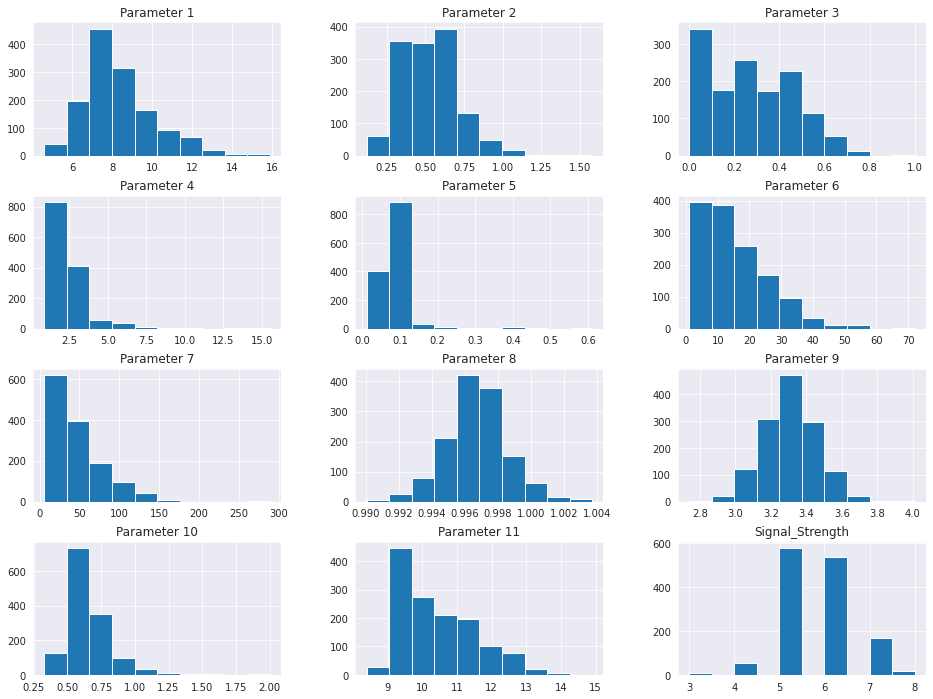

In [13]:
data.hist(figsize=(16, 12))
plt.show()

In [14]:
data.skew()

Parameter 1        0.941041
Parameter 2        0.729279
Parameter 3        0.312726
Parameter 4        4.548153
Parameter 5        5.502487
Parameter 6        1.226579
Parameter 7        1.540368
Parameter 8        0.044778
Parameter 9        0.232032
Parameter 10       2.406505
Parameter 11       0.859841
Signal_Strength    0.192407
dtype: float64

#### Observations:
1. Parameter 1, Parameter 2, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 10 and Parameter 11 are right skewed.
2. Parameter 3 we can observe multiple peaks and the data is concentrated on left side making it right skewed.
3. Parameter 8 and Parameter 9, we can say are almost normally distributed.

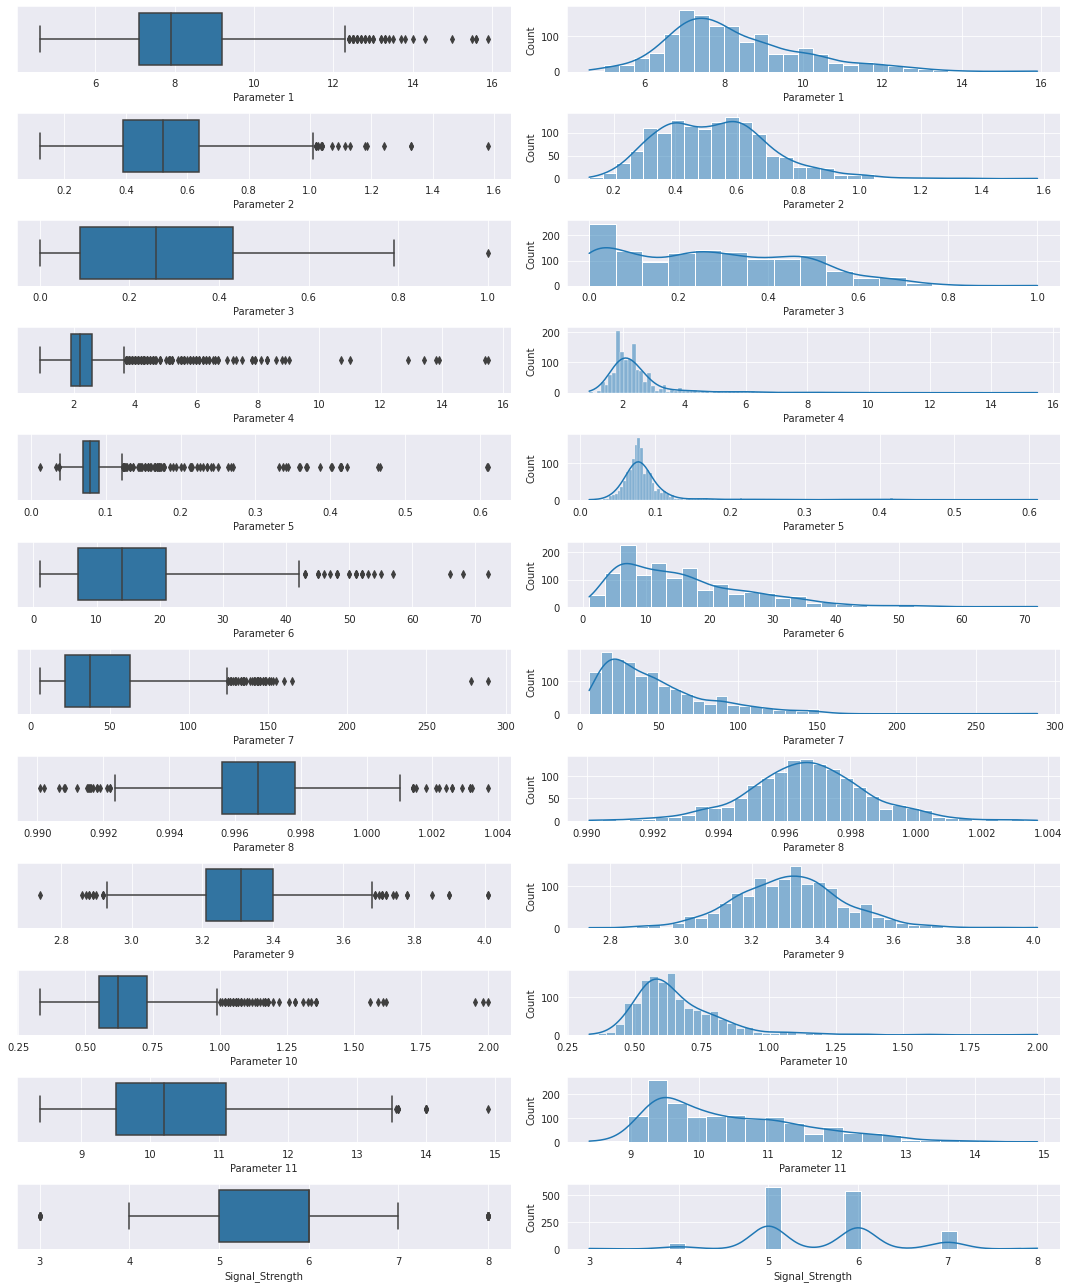

In [15]:
fig, ax = plt.subplots(data.shape[1], 2, figsize = (15, 18))

for index, col in enumerate(data.select_dtypes(include=np.number).columns):
    sns.boxplot(x= data[col], ax = ax[index, 0])
    sns.histplot(data[col], ax = ax[index, 1], kde=True)

plt.tight_layout()
plt.show()

#### Observations:
1. All columns are having outliers.
2. Except Parameter 3 and Parameter 11, we can observe very high number of outliers.
3. We cannot drop the records as the dataset size is small. So we will try to handle skewness in dataset and then observe the outliers.

### Handling Skewed Data

In [16]:
data_transformed = data.copy(deep=True)

In [17]:
skewed_columns = ['Parameter 1', 'Parameter 2', 'Parameter 4', 'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 10', 'Parameter 11']

In [18]:
data_transformed[skewed_columns] = data_transformed[skewed_columns].apply(np.log)

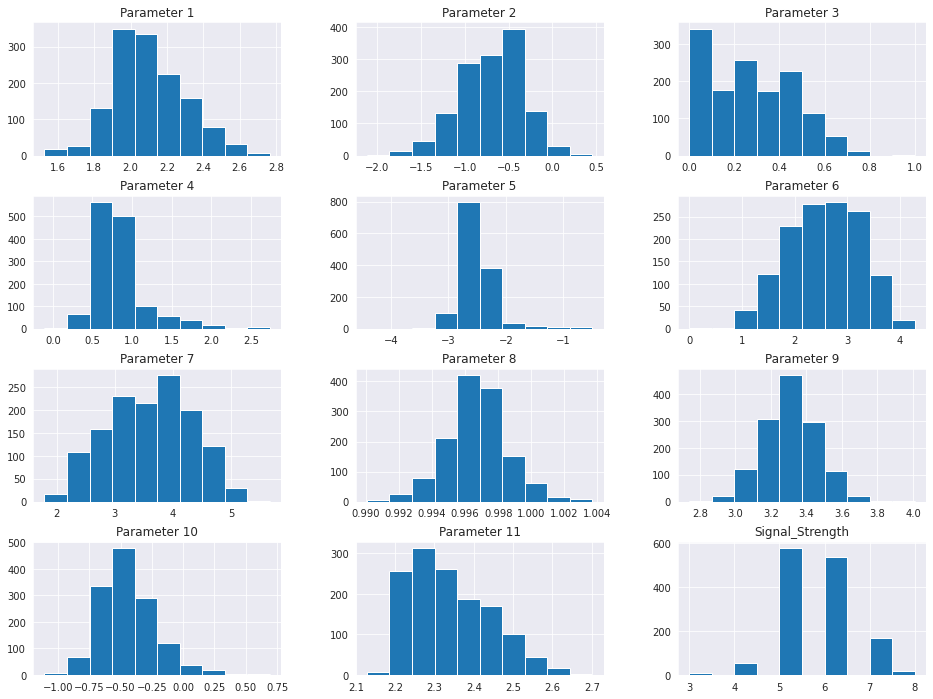

In [19]:
data_transformed.hist(figsize=(16, 12))
plt.show()

In [20]:
data_transformed.skew()

Parameter 1        0.348804
Parameter 2       -0.330795
Parameter 3        0.312726
Parameter 4        1.765238
Parameter 5        1.887642
Parameter 6       -0.220069
Parameter 7       -0.078161
Parameter 8        0.044778
Parameter 9        0.232032
Parameter 10       0.961460
Parameter 11       0.663359
Signal_Strength    0.192407
dtype: float64

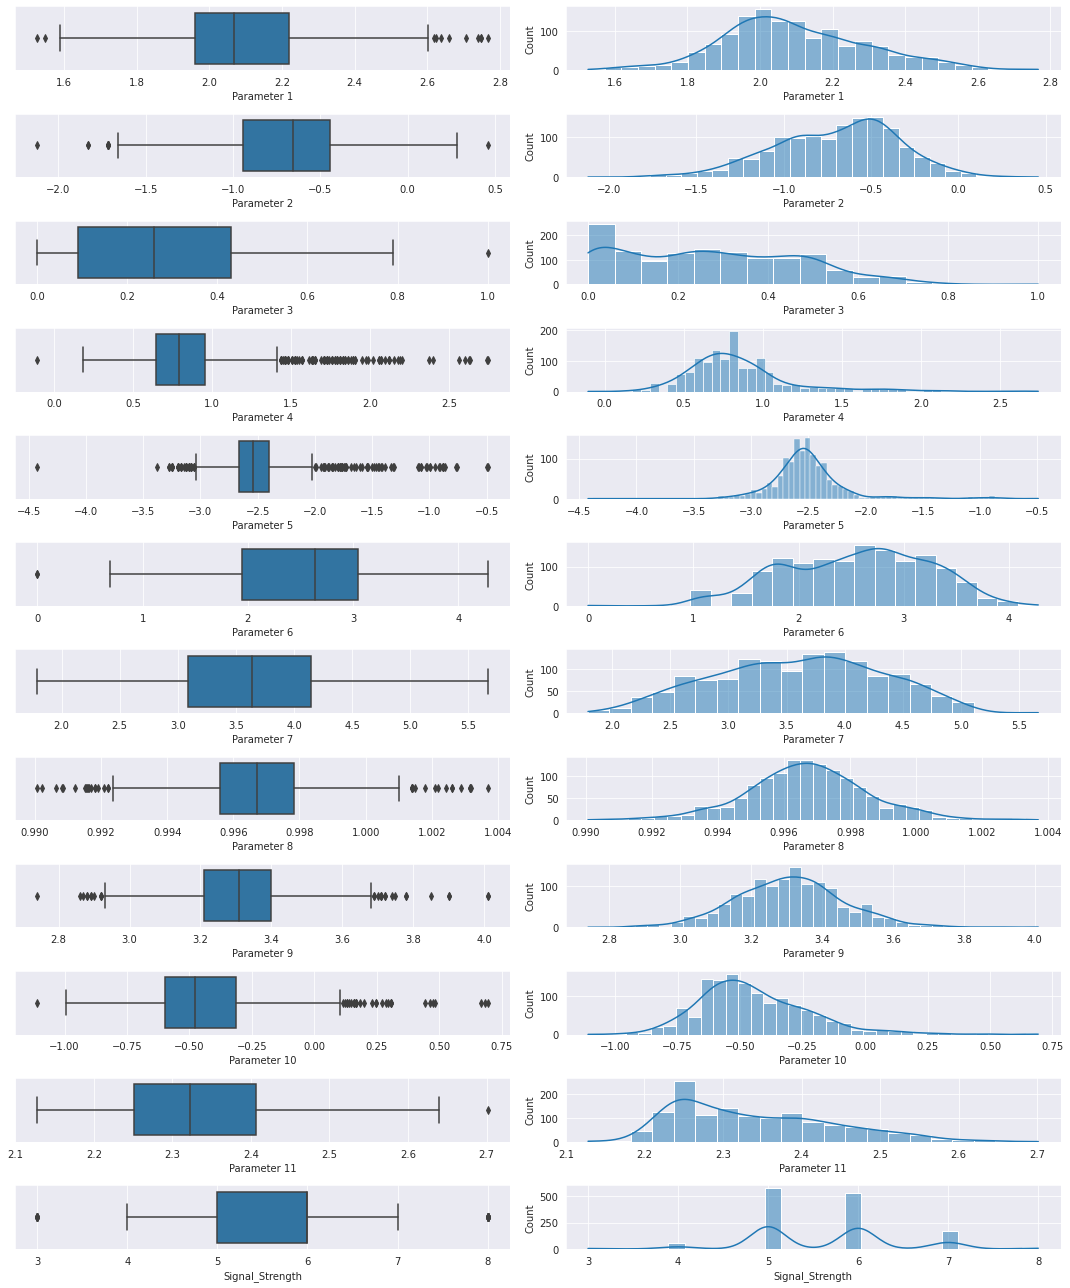

In [21]:
fig, ax = plt.subplots(data_transformed.shape[1], 2, figsize=(15, 18))

for index, col in enumerate(data_transformed.select_dtypes(include=np.number).columns):
    sns.boxplot(x=data_transformed[col], ax=ax[index, 0])
    sns.histplot(data_transformed[col], ax=ax[index, 1], kde=True)

plt.tight_layout()
plt.show()

#### Observations:
1. Parameter 4, Parameter 5, Parameter 8, Parameter 9 and Parameter 10 are having high number of outliers while in other columns, outliers count have been reduced after handling the skewness.
2. We can handle the outliers either by capping or replacing the values with mean but there is high probability of introducing new outliers after handling, so we will moving forward with the current dataset.

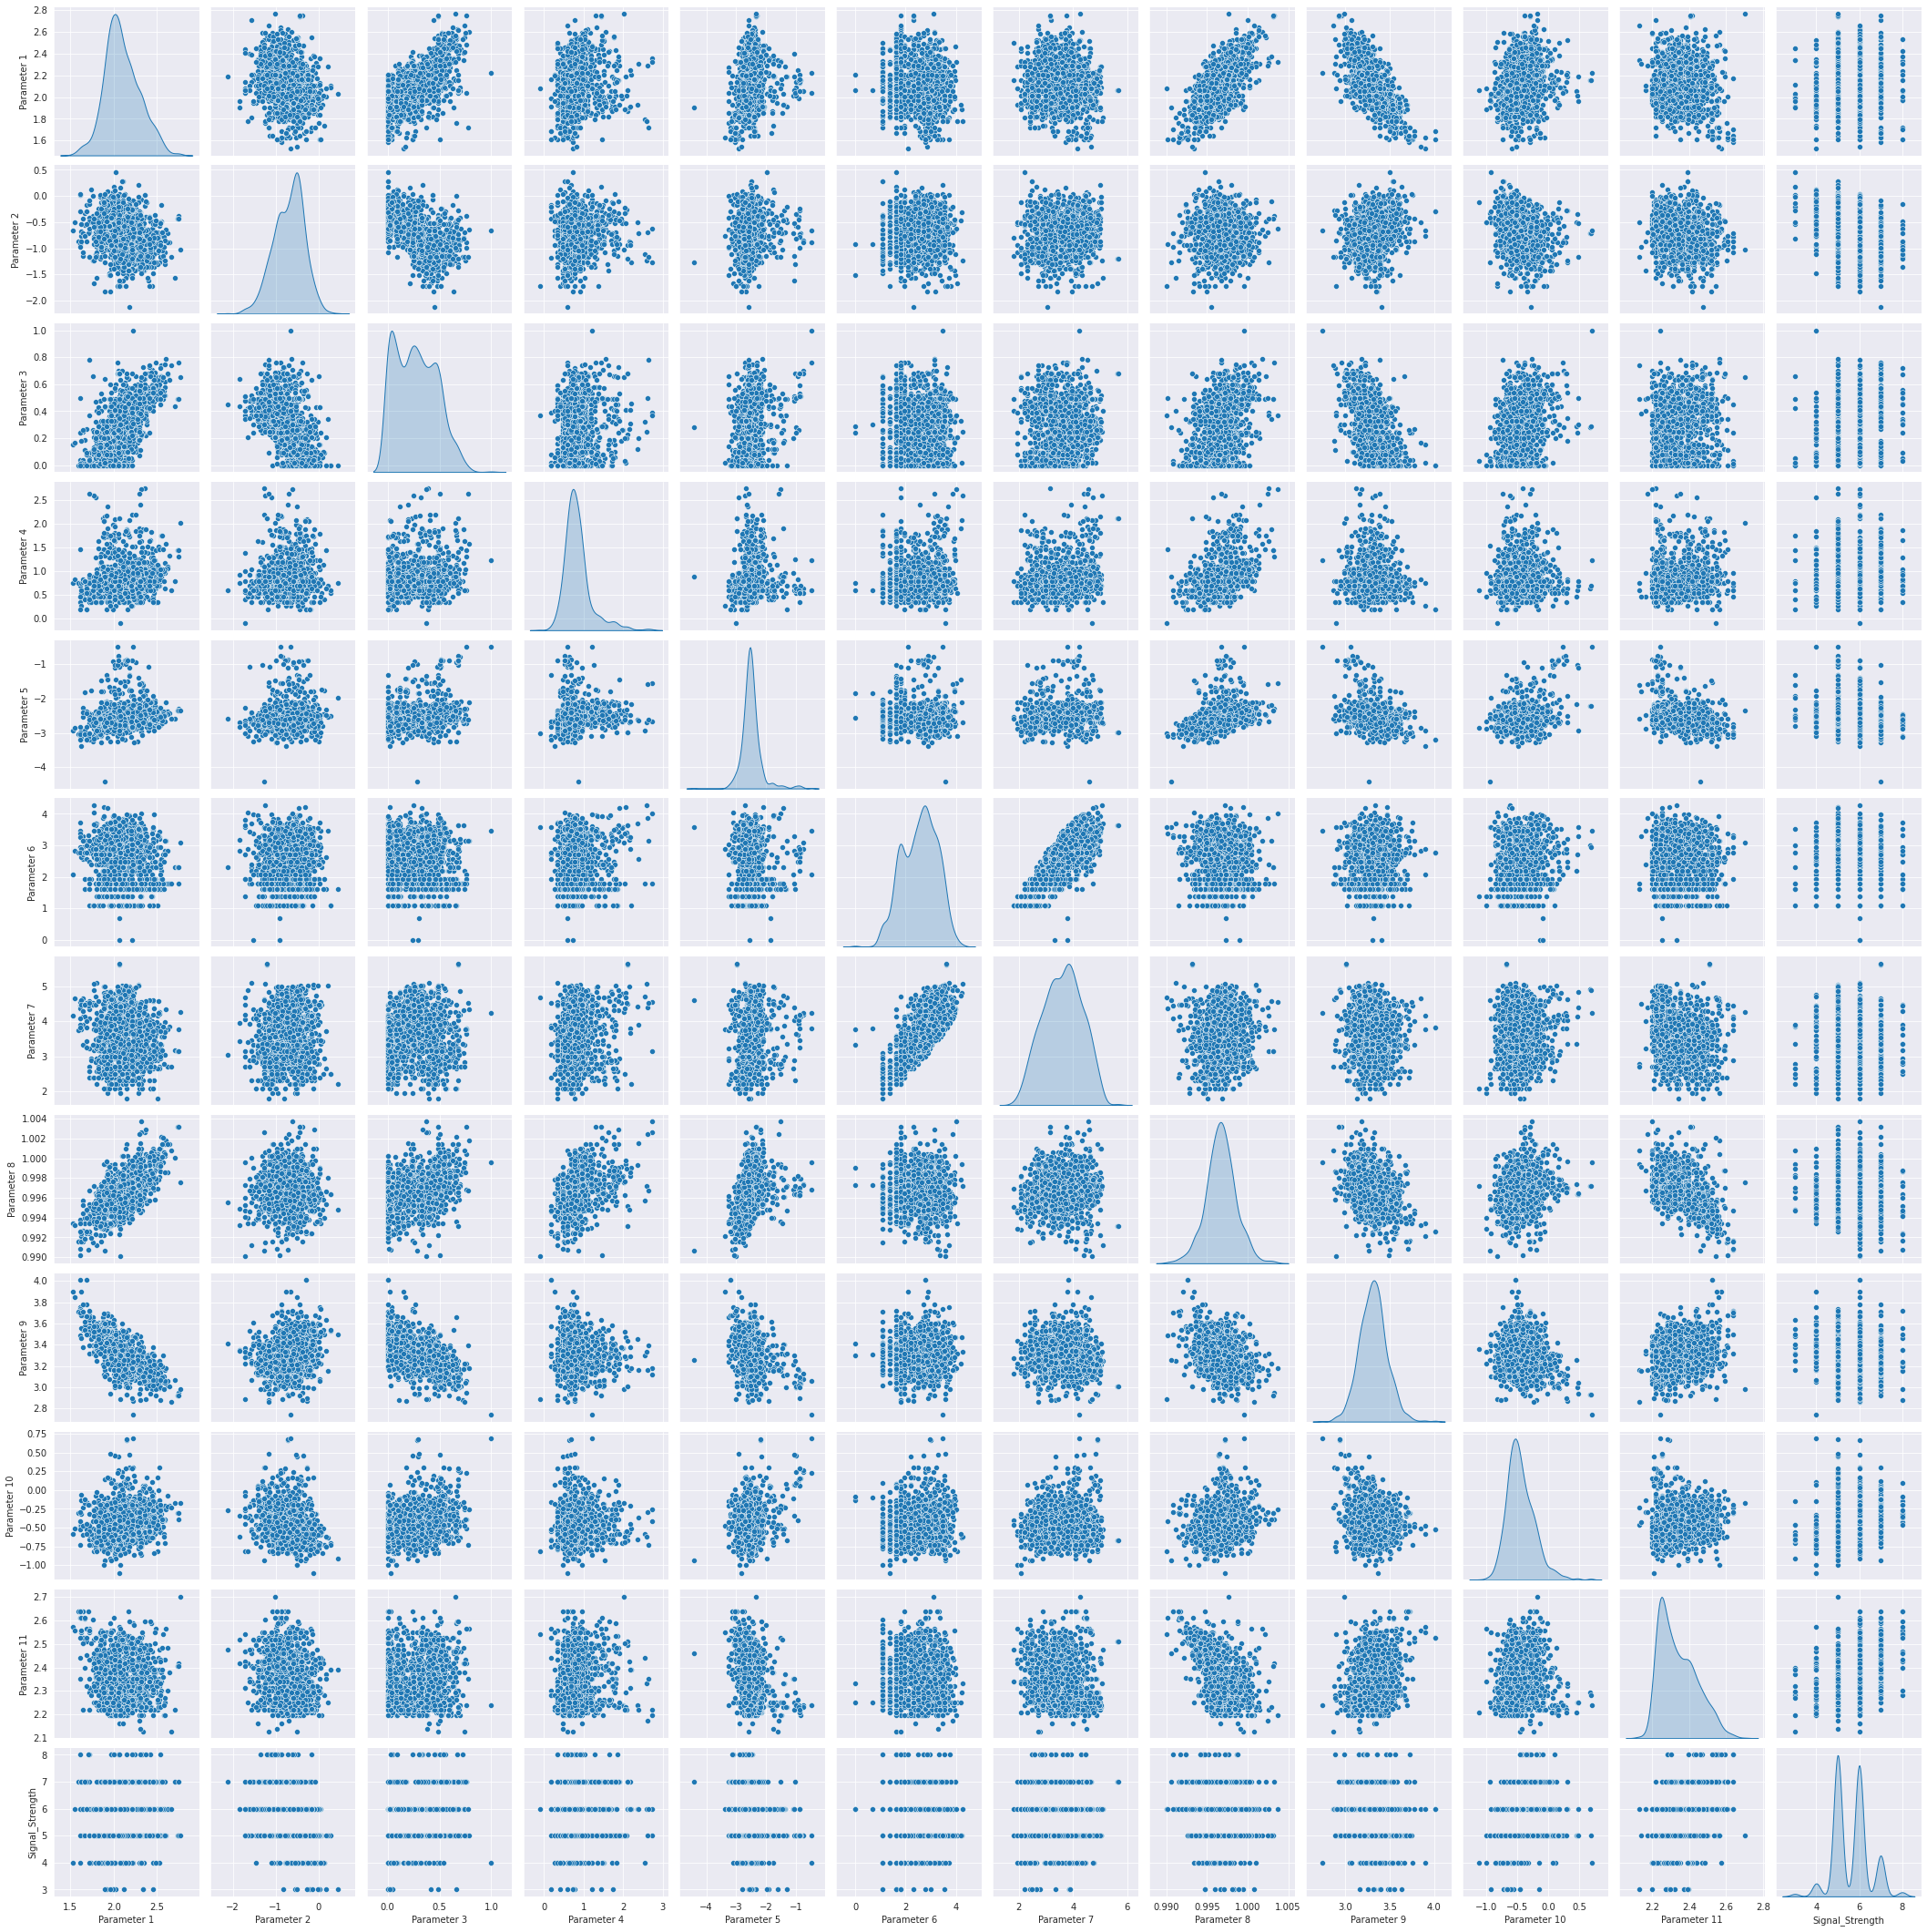

In [22]:
sns.pairplot(data_transformed, diag_kind='kde')
plt.show()

#### Observations:

1. Most of the columns relationship with the target column, we can see are scattered like a cloud. We cannot derive any good predictors based on the pairplot.
2. While there is linear relationship can be observed among the features itself like Parameter 8 and Parameter 1, Parameter 9 and Parameter 1, Parameter 8 and Parameter 11, etc.

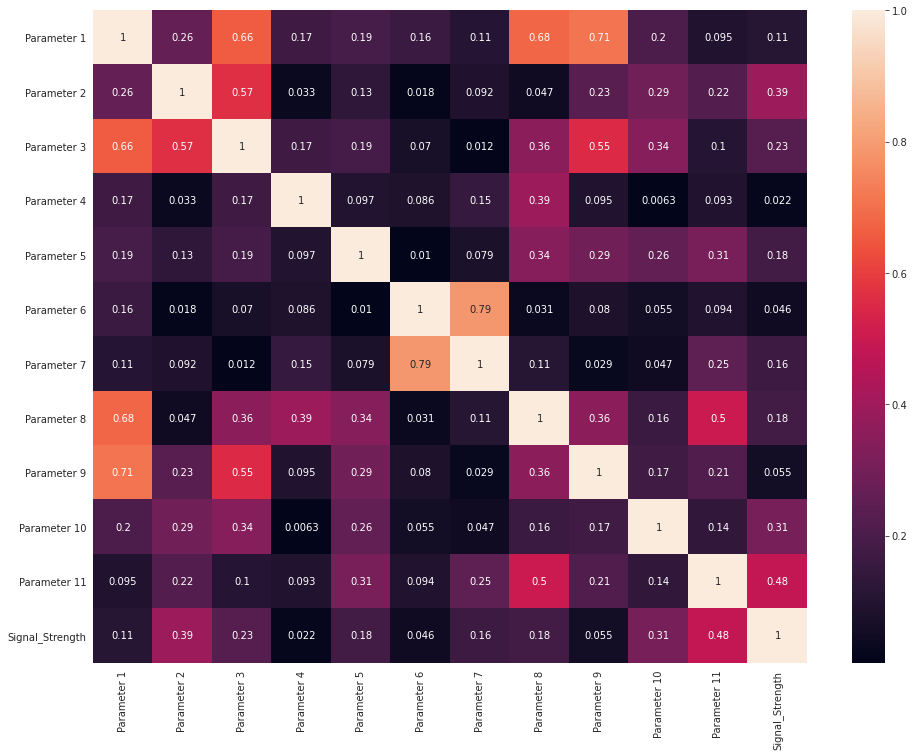

In [23]:
plt.figure(figsize=(16, 12))
sns.heatmap(data_transformed.corr().abs(), annot=True)
plt.show()

#### Observations:
1. Parameter 11 is having maximum correlation with target column followed by Parameter 2. 
2. The remaining columns have not much significant relationship with target column.
3. We can observe relationship among the features itself having high correlation like Parameter 6 and Parameter 7, Parameter 3 and Parameter 1, etc.

## Regression Model

In [24]:
train_dataset = data_transformed.sample(frac=0.75, random_state=12)
test_dataset = data_transformed.drop(train_dataset.index)

In [25]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Signal_Strength')
test_labels = test_features.pop('Signal_Strength')

In [26]:
reg_model = tf.keras.Sequential()

reg_model.add(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
reg_model.add(tf.keras.layers.Dense(100, activation='relu'))
reg_model.add(tf.keras.layers.Dense(250, activation='relu'))

reg_model.add(tf.keras.layers.Dense(1, activation='linear'))

In [27]:
reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 100)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               25250     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 26,745
Trainable params: 26,723
Non-trainable params: 22
_________________________________________________________________


In [28]:
reg_model.compile(optimizer='adam', loss=tf.keras.losses.mean_absolute_error, metrics=tf.keras.metrics.mean_squared_error)

In [29]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_reg_model.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', save_freq=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)

In [30]:
history = reg_model.fit(train_features, train_labels, batch_size=50, epochs=50, validation_data=(test_features, test_labels), callbacks=[earlystopping, checkpoint])

Epoch 1/50
 1/21 [>.............................] - ETA: 7s - loss: 5.9346 - mean_squared_error: 35.8036
Epoch 00001: loss improved from inf to 5.93464, saving model to best_reg_model.hdf5

Epoch 00001: loss improved from 5.93464 to 5.81931, saving model to best_reg_model.hdf5

Epoch 00001: loss improved from 5.81931 to 5.59543, saving model to best_reg_model.hdf5
 4/21 [====>.........................] - ETA: 0s - loss: 5.7121 - mean_squared_error: 33.3122
Epoch 00001: loss improved from 5.59543 to 5.49915, saving model to best_reg_model.hdf5

Epoch 00001: loss improved from 5.49915 to 5.46058, saving model to best_reg_model.hdf5

Epoch 00001: loss improved from 5.46058 to 5.35333, saving model to best_reg_model.hdf5
 7/21 [=========>....................] - ETA: 0s - loss: 5.5583 - mean_squared_error: 31.6728
Epoch 00001: loss improved from 5.35333 to 5.24538, saving model to best_reg_model.hdf5

Epoch 00001: loss improved from 5.24538 to 5.13829, saving model to best_reg_model.hdf5

E


Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044
17/21 [=======================>......] - ETA: 0s - loss: 1.0431 - mean_squared_error: 1.8997
Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044

Epoch 00005: loss did not improve from 0.99044
21/21 [==============================] - 0s 5ms/step - loss: 1.0435 - mean_squared_error: 1.

19/21 [==========================>...] - ETA: 0s - loss: 0.7140 - mean_squared_error: 0.8626
Epoch 00010: loss did not improve from 0.66969

Epoch 00010: loss did not improve from 0.66969

Epoch 00010: loss did not improve from 0.66969
21/21 [==============================] - 0s 5ms/step - loss: 0.7191 - mean_squared_error: 0.8781 - val_loss: 0.8151 - val_mean_squared_error: 0.9733
Epoch 11/50
 1/21 [>.............................] - ETA: 0s - loss: 0.6624 - mean_squared_error: 0.6932
Epoch 00011: loss improved from 0.66969 to 0.66235, saving model to best_reg_model.hdf5

Epoch 00011: loss did not improve from 0.66235

Epoch 00011: loss did not improve from 0.66235

Epoch 00011: loss did not improve from 0.66235

Epoch 00011: loss did not improve from 0.66235

Epoch 00011: loss did not improve from 0.66235

Epoch 00011: loss did not improve from 0.66235

Epoch 00011: loss did not improve from 0.66235

Epoch 00011: loss did not improve from 0.66235

Epoch 00011: loss did not improve fro

Epoch 17/50
 1/21 [>.............................] - ETA: 0s - loss: 0.6003 - mean_squared_error: 0.5674
Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not improve from 0.45783

Epoch 00017: loss did not impro


Epoch 00023: loss did not improve from 0.39852
21/21 [==============================] - 0s 4ms/step - loss: 0.5067 - mean_squared_error: 0.4466 - val_loss: 0.6066 - val_mean_squared_error: 0.6022
Epoch 24/50
 1/21 [>.............................] - ETA: 0s - loss: 0.5616 - mean_squared_error: 0.4975
Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not improve from 0.39852

Epoch 00024: loss did not 


Epoch 00030: loss did not improve from 0.38698

Epoch 00030: loss did not improve from 0.38698

Epoch 00030: loss did not improve from 0.38698

Epoch 00030: loss did not improve from 0.38698
21/21 [==============================] - 0s 4ms/step - loss: 0.4750 - mean_squared_error: 0.3898 - val_loss: 0.5217 - val_mean_squared_error: 0.4578
Epoch 31/50
 1/21 [>.............................] - ETA: 0s - loss: 0.4491 - mean_squared_error: 0.3670
Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not improve from 0.38698

Epoch 00031: loss did not 

21/21 [==============================] - 0s 4ms/step - loss: 0.4530 - mean_squared_error: 0.3810 - val_loss: 0.5067 - val_mean_squared_error: 0.4355
Epoch 38/50
 1/21 [>.............................] - ETA: 0s - loss: 0.4496 - mean_squared_error: 0.3799
Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not improve from 0.38698

Epoch 00038: loss did not 


Epoch 00044: loss did not improve from 0.38604

Epoch 00044: loss did not improve from 0.38604

Epoch 00044: loss did not improve from 0.38604

Epoch 00044: loss did not improve from 0.38604

Epoch 00044: loss did not improve from 0.38604

Epoch 00044: loss did not improve from 0.38604

Epoch 00044: loss did not improve from 0.38604

Epoch 00044: loss did not improve from 0.38604

Epoch 00044: loss did not improve from 0.38604
21/21 [==============================] - 0s 4ms/step - loss: 0.4364 - mean_squared_error: 0.3515 - val_loss: 0.5064 - val_mean_squared_error: 0.4288
Epoch 45/50
 1/21 [>.............................] - ETA: 0s - loss: 0.4434 - mean_squared_error: 0.3419
Epoch 00045: loss did not improve from 0.38604

Epoch 00045: loss did not improve from 0.38604

Epoch 00045: loss did not improve from 0.38604

Epoch 00045: loss did not improve from 0.38604

Epoch 00045: loss did not improve from 0.38604

Epoch 00045: loss did not improve from 0.38604

Epoch 00045: loss did not 

In [31]:
# Save the model
reg_model.save('regressor-1.h5')

In [32]:
# Pickle format
import pickle
with open('regressor-2.pkl', 'wb') as file:
    pickle.dump(reg_model.get_weights(), file)

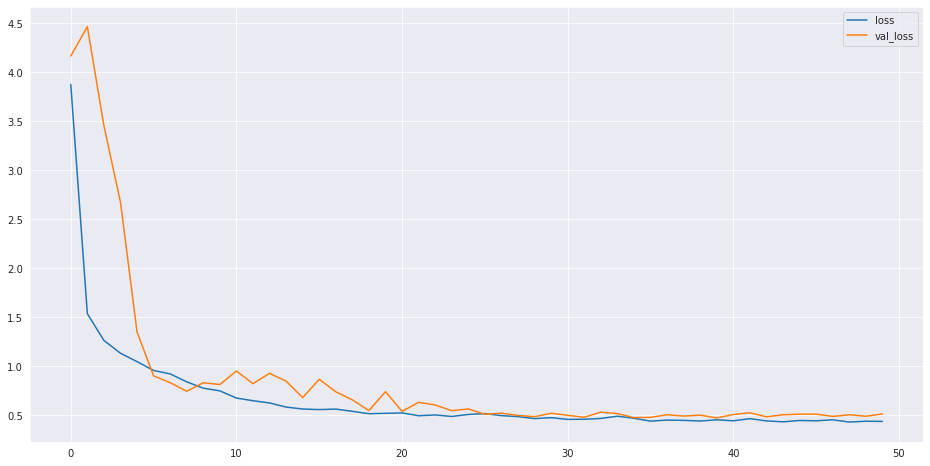

In [33]:
# Loss plot
plt.figure(figsize=(16, 8))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

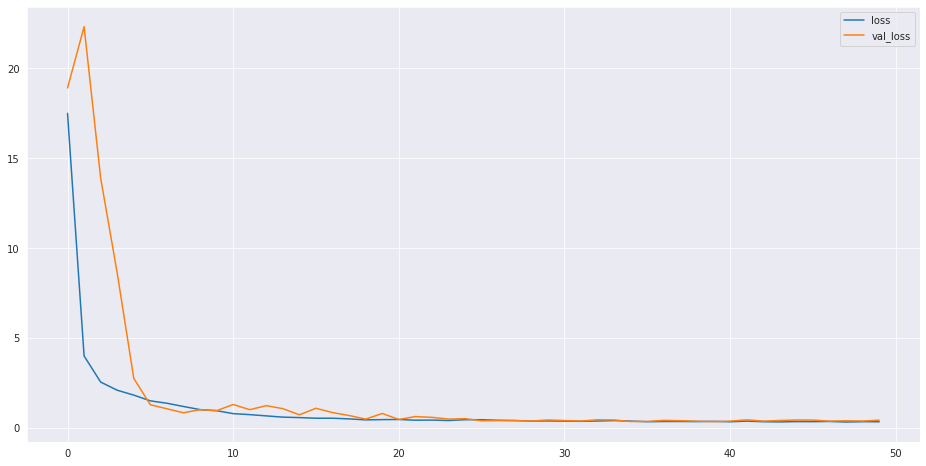

In [34]:
# Metric plot
plt.figure(figsize=(16, 8))
plt.plot(history.epoch, history.history['mean_squared_error'])
plt.plot(history.epoch, history.history['val_mean_squared_error'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [35]:
reg_pred_ = reg_model.predict(test_features)

/home/abhishek/Workspace/jupyter-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1152x720 with 0 Axes>

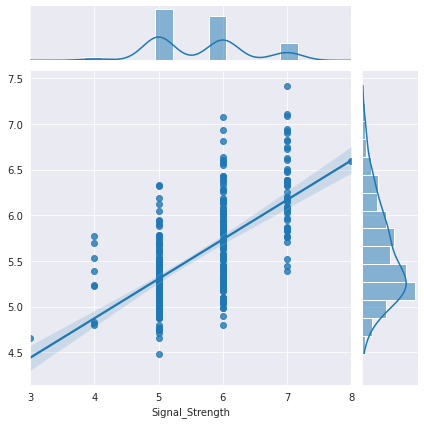

In [36]:
plt.figure(figsize=(16, 10))
sns.jointplot(test_labels, reg_pred_.flatten(), kind="reg")
plt.show()

### Tuning the model

In [37]:
def create_model(layers, optimizer, loss, metrics, batch_size, epoch, callbacks):
    model = tf.keras.Sequential()
    for layer in layers:
        model.add(layer)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = model.fit(train_features, train_labels, batch_size=batch_size, epochs=epoch, validation_data=(test_features, test_labels), callbacks=callbacks)
    return history, model

In [38]:
layers = list()
layers.append(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
layers.append(tf.keras.layers.Dense(100, activation='relu'))
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.Dense(250, activation='relu'))
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.Dense(1, activation='linear'))

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_reg_model-1.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', save_freq=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)
]

history_reg_1, reg_model_1 = create_model(layers, 'adam', 'mae', 'mse', 100, 100, callbacks)

Epoch 1/100
 1/11 [=>............................] - ETA: 3s - loss: 5.8921 - mse: 35.3479
Epoch 00001: loss improved from inf to 5.89207, saving model to best_reg_model-1.hdf5

Epoch 00001: loss improved from 5.89207 to 5.68311, saving model to best_reg_model-1.hdf5

Epoch 00001: loss improved from 5.68311 to 5.63376, saving model to best_reg_model-1.hdf5
 4/11 [=========>....................] - ETA: 0s - loss: 5.6812 - mse: 33.0531
Epoch 00001: loss improved from 5.63376 to 5.51601, saving model to best_reg_model-1.hdf5

Epoch 00001: loss improved from 5.51601 to 5.42992, saving model to best_reg_model-1.hdf5

Epoch 00001: loss improved from 5.42992 to 5.34968, saving model to best_reg_model-1.hdf5
 7/11 [==================>...........] - ETA: 0s - loss: 5.5387 - mse: 31.5198
Epoch 00001: loss improved from 5.34968 to 5.26652, saving model to best_reg_model-1.hdf5

Epoch 00001: loss improved from 5.26652 to 5.18422, saving model to best_reg_model-1.hdf5

Epoch 00001: loss improved fr

Epoch 9/100
 1/11 [=>............................] - ETA: 0s - loss: 0.9968 - mse: 1.6504
Epoch 00009: loss improved from 1.01199 to 0.99679, saving model to best_reg_model-1.hdf5

Epoch 00009: loss did not improve from 0.99679

Epoch 00009: loss did not improve from 0.99679

Epoch 00009: loss did not improve from 0.99679
 5/11 [============>.................] - ETA: 0s - loss: 1.1075 - mse: 2.2000
Epoch 00009: loss did not improve from 0.99679

Epoch 00009: loss did not improve from 0.99679

Epoch 00009: loss did not improve from 0.99679

Epoch 00009: loss did not improve from 0.99679

Epoch 00009: loss did not improve from 0.99679

Epoch 00009: loss did not improve from 0.99679

Epoch 00009: loss did not improve from 0.99679
11/11 [==============================] - 0s 11ms/step - loss: 1.1196 - mse: 2.1918 - val_loss: 1.7912 - val_mse: 4.4712
Epoch 10/100
 1/11 [=>............................] - ETA: 0s - loss: 0.9855 - mse: 1.6146
Epoch 00010: loss improved from 0.99679 to 0.98549, 

11/11 [==============================] - 0s 9ms/step - loss: 0.8413 - mse: 1.2057 - val_loss: 0.7446 - val_mse: 0.8420
Epoch 20/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8566 - mse: 1.2737
Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913

Epoch 00020: loss did not improve from 0.69913
11/11 [==============================] - 0s 7ms/step - loss: 0.8617 - mse: 1.2530 - val_loss: 0.7257 - val_mse: 0.7908
Epoch 21/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8478 - mse: 1.2383
Epoch 00021: loss did not improve from 0.69913

Epoch

Epoch 31/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8112 - mse: 1.0735
Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105

Epoch 00031: loss did not improve from 0.69105
11/11 [==============================] - 0s 7ms/step - loss: 0.7281 - mse: 0.8902 - val_loss: 0.5608 - val_mse: 0.4842
Epoch 32/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7196 - mse: 0.8909
Epoch 00032: loss did not improve from 0.69105

Epoch 00032: loss did not improve from 0.69105

Epoch 00032: loss did not improve from 0.69105

Epoch 00032: loss improved f

11/11 [==============================] - 0s 7ms/step - loss: 0.6713 - mse: 0.7788 - val_loss: 0.5443 - val_mse: 0.4644
Epoch 42/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6289 - mse: 0.6325
Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699

Epoch 00042: loss did not improve from 0.57699
11/11 [==============================] - 0s 7ms/step - loss: 0.6351 - mse: 0.6832 - val_loss: 0.5720 - val_mse: 0.5131
Epoch 43/100
 1/11 [=>............................] - ETA: 0s - loss: 0.5967 - mse: 0.6211
Epoch 00043: loss did not improve from 0.57699

Epoch

Epoch 53/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7101 - mse: 0.7534
Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756

Epoch 00053: loss did not improve from 0.56756
11/11 [==============================] - 0s 7ms/step - loss: 0.6334 - mse: 0.6611 - val_loss: 0.5200 - val_mse: 0.4332
Epoch 54/100
 1/11 [=>............................] - ETA: 0s - loss: 0.6251 - mse: 0.6282
Epoch 00054: loss did not improve from 0.56756

Epoch 00054: loss did not improve from 0.56756

Epoch 00054: loss did not improve from 0.56756

Epoch 00054: loss did not im

In [39]:
layers = list()
layers.append(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
layers.append(tf.keras.layers.Dense(100, activation='relu'))
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.LeakyReLU())
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.Dense(1, activation='linear'))

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_reg_model-2.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', save_freq=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)
]

history_reg_2, reg_model_2 = create_model(layers, 'adagrad', 'mse', 'mse', 100, 100, callbacks)

Epoch 1/100
 1/11 [=>............................] - ETA: 6s - loss: 29.6305 - mse: 29.6305
Epoch 00001: loss improved from inf to 29.63054, saving model to best_reg_model-2.hdf5

Epoch 00001: loss improved from 29.63054 to 28.41349, saving model to best_reg_model-2.hdf5

Epoch 00001: loss did not improve from 28.41349

Epoch 00001: loss did not improve from 28.41349

Epoch 00001: loss improved from 28.41349 to 28.39913, saving model to best_reg_model-2.hdf5

Epoch 00001: loss did not improve from 28.39913

Epoch 00001: loss did not improve from 28.39913
 8/11 [====================>.........] - ETA: 0s - loss: 28.7159 - mse: 28.7159
Epoch 00001: loss did not improve from 28.39913

Epoch 00001: loss did not improve from 28.39913

Epoch 00001: loss did not improve from 28.39913

Epoch 00001: loss did not improve from 28.39913
11/11 [==============================] - 1s 20ms/step - loss: 28.6656 - mse: 28.6656 - val_loss: 22.5181 - val_mse: 22.5181
Epoch 2/100
 1/11 [=>...................


Epoch 00009: loss did not improve from 22.46957
11/11 [==============================] - 0s 8ms/step - loss: 23.0117 - mse: 23.0117 - val_loss: 20.8822 - val_mse: 20.8822
Epoch 10/100
 1/11 [=>............................] - ETA: 0s - loss: 21.7352 - mse: 21.7352
Epoch 00010: loss improved from 22.46957 to 21.73515, saving model to best_reg_model-2.hdf5

Epoch 00010: loss improved from 21.73515 to 21.08838, saving model to best_reg_model-2.hdf5

Epoch 00010: loss did not improve from 21.08838

Epoch 00010: loss did not improve from 21.08838

Epoch 00010: loss did not improve from 21.08838

Epoch 00010: loss did not improve from 21.08838

Epoch 00010: loss did not improve from 21.08838

Epoch 00010: loss did not improve from 21.08838

Epoch 00010: loss did not improve from 21.08838
10/11 [==========================>...] - ETA: 0s - loss: 22.1015 - mse: 22.1015
Epoch 00010: loss did not improve from 21.08838

Epoch 00010: loss did not improve from 21.08838
11/11 [=======================

In [40]:
layers = list()
layers.append(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
layers.append(tf.keras.layers.Dense(100, activation='relu'))
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.LeakyReLU(100))
layers.append(tf.keras.layers.Dropout(0.50))
layers.append(tf.keras.layers.Dense(1, activation='linear'))

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_reg_model-3.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', save_freq=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)
]

history_reg_3, reg_model_3 = create_model(layers, 'rmsprop', 'mse', 'mse', 50, 100, callbacks)

Epoch 1/100
 1/21 [>.............................] - ETA: 8s - loss: 35.2321 - mse: 35.2321
Epoch 00001: loss improved from inf to 35.23208, saving model to best_reg_model-3.hdf5

Epoch 00001: loss improved from 35.23208 to 34.05308, saving model to best_reg_model-3.hdf5

Epoch 00001: loss improved from 34.05308 to 31.92741, saving model to best_reg_model-3.hdf5

Epoch 00001: loss improved from 31.92741 to 31.71210, saving model to best_reg_model-3.hdf5
 5/21 [======>.......................] - ETA: 0s - loss: 32.9575 - mse: 32.9575
Epoch 00001: loss did not improve from 31.71210

Epoch 00001: loss improved from 31.71210 to 31.25516, saving model to best_reg_model-3.hdf5

Epoch 00001: loss improved from 31.25516 to 30.84559, saving model to best_reg_model-3.hdf5

Epoch 00001: loss improved from 30.84559 to 30.44307, saving model to best_reg_model-3.hdf5

Epoch 00001: loss improved from 30.44307 to 30.25843, saving model to best_reg_model-3.hdf5
10/21 [=============>................] - E

21/21 [==============================] - 0s 5ms/step - loss: 10.5623 - mse: 10.5623 - val_loss: 3.6242 - val_mse: 3.6242
Epoch 5/100
 1/21 [>.............................] - ETA: 0s - loss: 8.7360 - mse: 8.7360
Epoch 00005: loss improved from 9.69771 to 8.73600, saving model to best_reg_model-3.hdf5

Epoch 00005: loss improved from 8.73600 to 8.29164, saving model to best_reg_model-3.hdf5

Epoch 00005: loss improved from 8.29164 to 7.62856, saving model to best_reg_model-3.hdf5
 4/21 [====>.........................] - ETA: 0s - loss: 8.0055 - mse: 8.0055
Epoch 00005: loss improved from 7.62856 to 7.36571, saving model to best_reg_model-3.hdf5

Epoch 00005: loss improved from 7.36571 to 7.31073, saving model to best_reg_model-3.hdf5

Epoch 00005: loss did not improve from 7.31073

Epoch 00005: loss did not improve from 7.31073

Epoch 00005: loss did not improve from 7.31073

Epoch 00005: loss did not improve from 7.31073

Epoch 00005: loss did not improve from 7.31073

Epoch 00005: loss

Epoch 10/100
 1/21 [>.............................] - ETA: 0s - loss: 3.3440 - mse: 3.3440
Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.29540

Epoch 00010: loss did not improve from 3.2954

21/21 [==============================] - 0s 6ms/step - loss: 2.6160 - mse: 2.6160 - val_loss: 0.9722 - val_mse: 0.9722
Epoch 17/100
 1/21 [>.............................] - ETA: 0s - loss: 2.9359 - mse: 2.9359
Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did not improve from 2.17144

Epoch 00017: loss did 


Epoch 00023: loss did not improve from 1.54065

Epoch 00023: loss did not improve from 1.54065
17/21 [=======================>......] - ETA: 0s - loss: 2.0303 - mse: 2.0303
Epoch 00023: loss did not improve from 1.54065

Epoch 00023: loss did not improve from 1.54065

Epoch 00023: loss did not improve from 1.54065

Epoch 00023: loss did not improve from 1.54065

Epoch 00023: loss did not improve from 1.54065
21/21 [==============================] - 0s 5ms/step - loss: 2.0243 - mse: 2.0243 - val_loss: 0.6709 - val_mse: 0.6709
Epoch 24/100
 1/21 [>.............................] - ETA: 0s - loss: 2.3331 - mse: 2.3331
Epoch 00024: loss did not improve from 1.54065

Epoch 00024: loss did not improve from 1.54065

Epoch 00024: loss did not improve from 1.54065

Epoch 00024: loss did not improve from 1.54065

Epoch 00024: loss did not improve from 1.54065

Epoch 00024: loss did not improve from 1.54065

Epoch 00024: loss did not improve from 1.54065

Epoch 00024: loss did not improve from 1.

21/21 [==============================] - ETA: 0s - loss: 1.4859 - mse: 1.4859
Epoch 00030: loss did not improve from 1.29773
21/21 [==============================] - 0s 6ms/step - loss: 1.4877 - mse: 1.4877 - val_loss: 0.5088 - val_mse: 0.5088
Epoch 31/100
 1/21 [>.............................] - ETA: 0s - loss: 1.6154 - mse: 1.6154
Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.29773

Epoch 00031: loss did not improve from 1.


Epoch 00037: loss did not improve from 1.13851
21/21 [==============================] - 0s 4ms/step - loss: 1.3917 - mse: 1.3917 - val_loss: 0.4832 - val_mse: 0.4832
Epoch 38/100
 1/21 [>.............................] - ETA: 0s - loss: 1.5172 - mse: 1.5172
Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did not improve from 1.13851

Epoch 00038: loss did 

21/21 [==============================] - 0s 4ms/step - loss: 1.2361 - mse: 1.2361 - val_loss: 0.4360 - val_mse: 0.4360
Epoch 45/100
 1/21 [>.............................] - ETA: 0s - loss: 1.0513 - mse: 1.0513
Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did not improve from 0.71594

Epoch 00045: loss did 

21/21 [==============================] - 0s 4ms/step - loss: 1.0720 - mse: 1.0720 - val_loss: 0.4130 - val_mse: 0.4130
Epoch 52/100
 1/21 [>.............................] - ETA: 0s - loss: 1.1642 - mse: 1.1642
Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did not improve from 0.71594

Epoch 00052: loss did 

21/21 [==============================] - 0s 4ms/step - loss: 1.0095 - mse: 1.0095 - val_loss: 0.4148 - val_mse: 0.4148
Epoch 59/100
 1/21 [>.............................] - ETA: 0s - loss: 1.3224 - mse: 1.3224
Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did not improve from 0.71594

Epoch 00059: loss did 

#### Observations:
1. We have used Adam, RMSProp and Adagrad as optimizer and MSE for validation metrics.
2. As it can be observed that even after several iterations, the MSE value is not improving based on which we can conclude the data used for training a neural network is very less.
3. Based on the residual plot, the residuals are left skewed which most probably due to outliers present in the dataset. But as we concluded, the amount of data needs to increase for improving the model.

## Classification Model

In [41]:
data['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

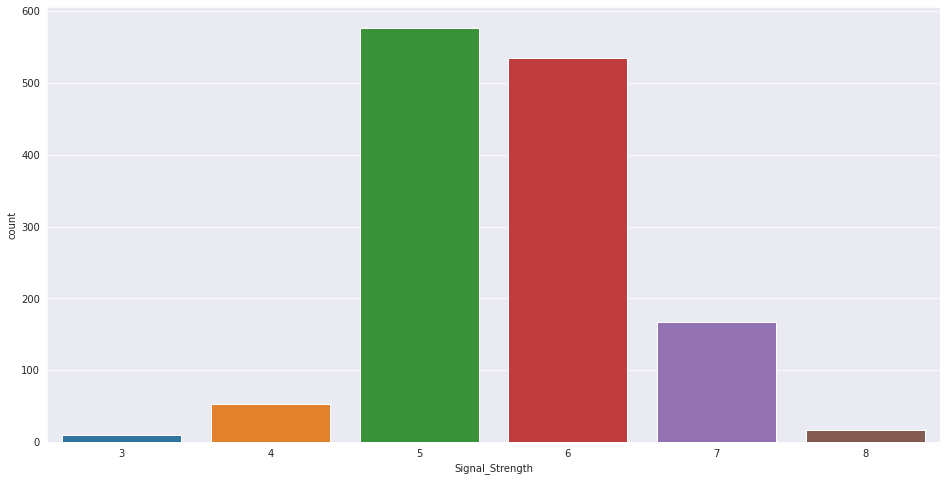

In [42]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Signal_Strength', data=data)
plt.show()

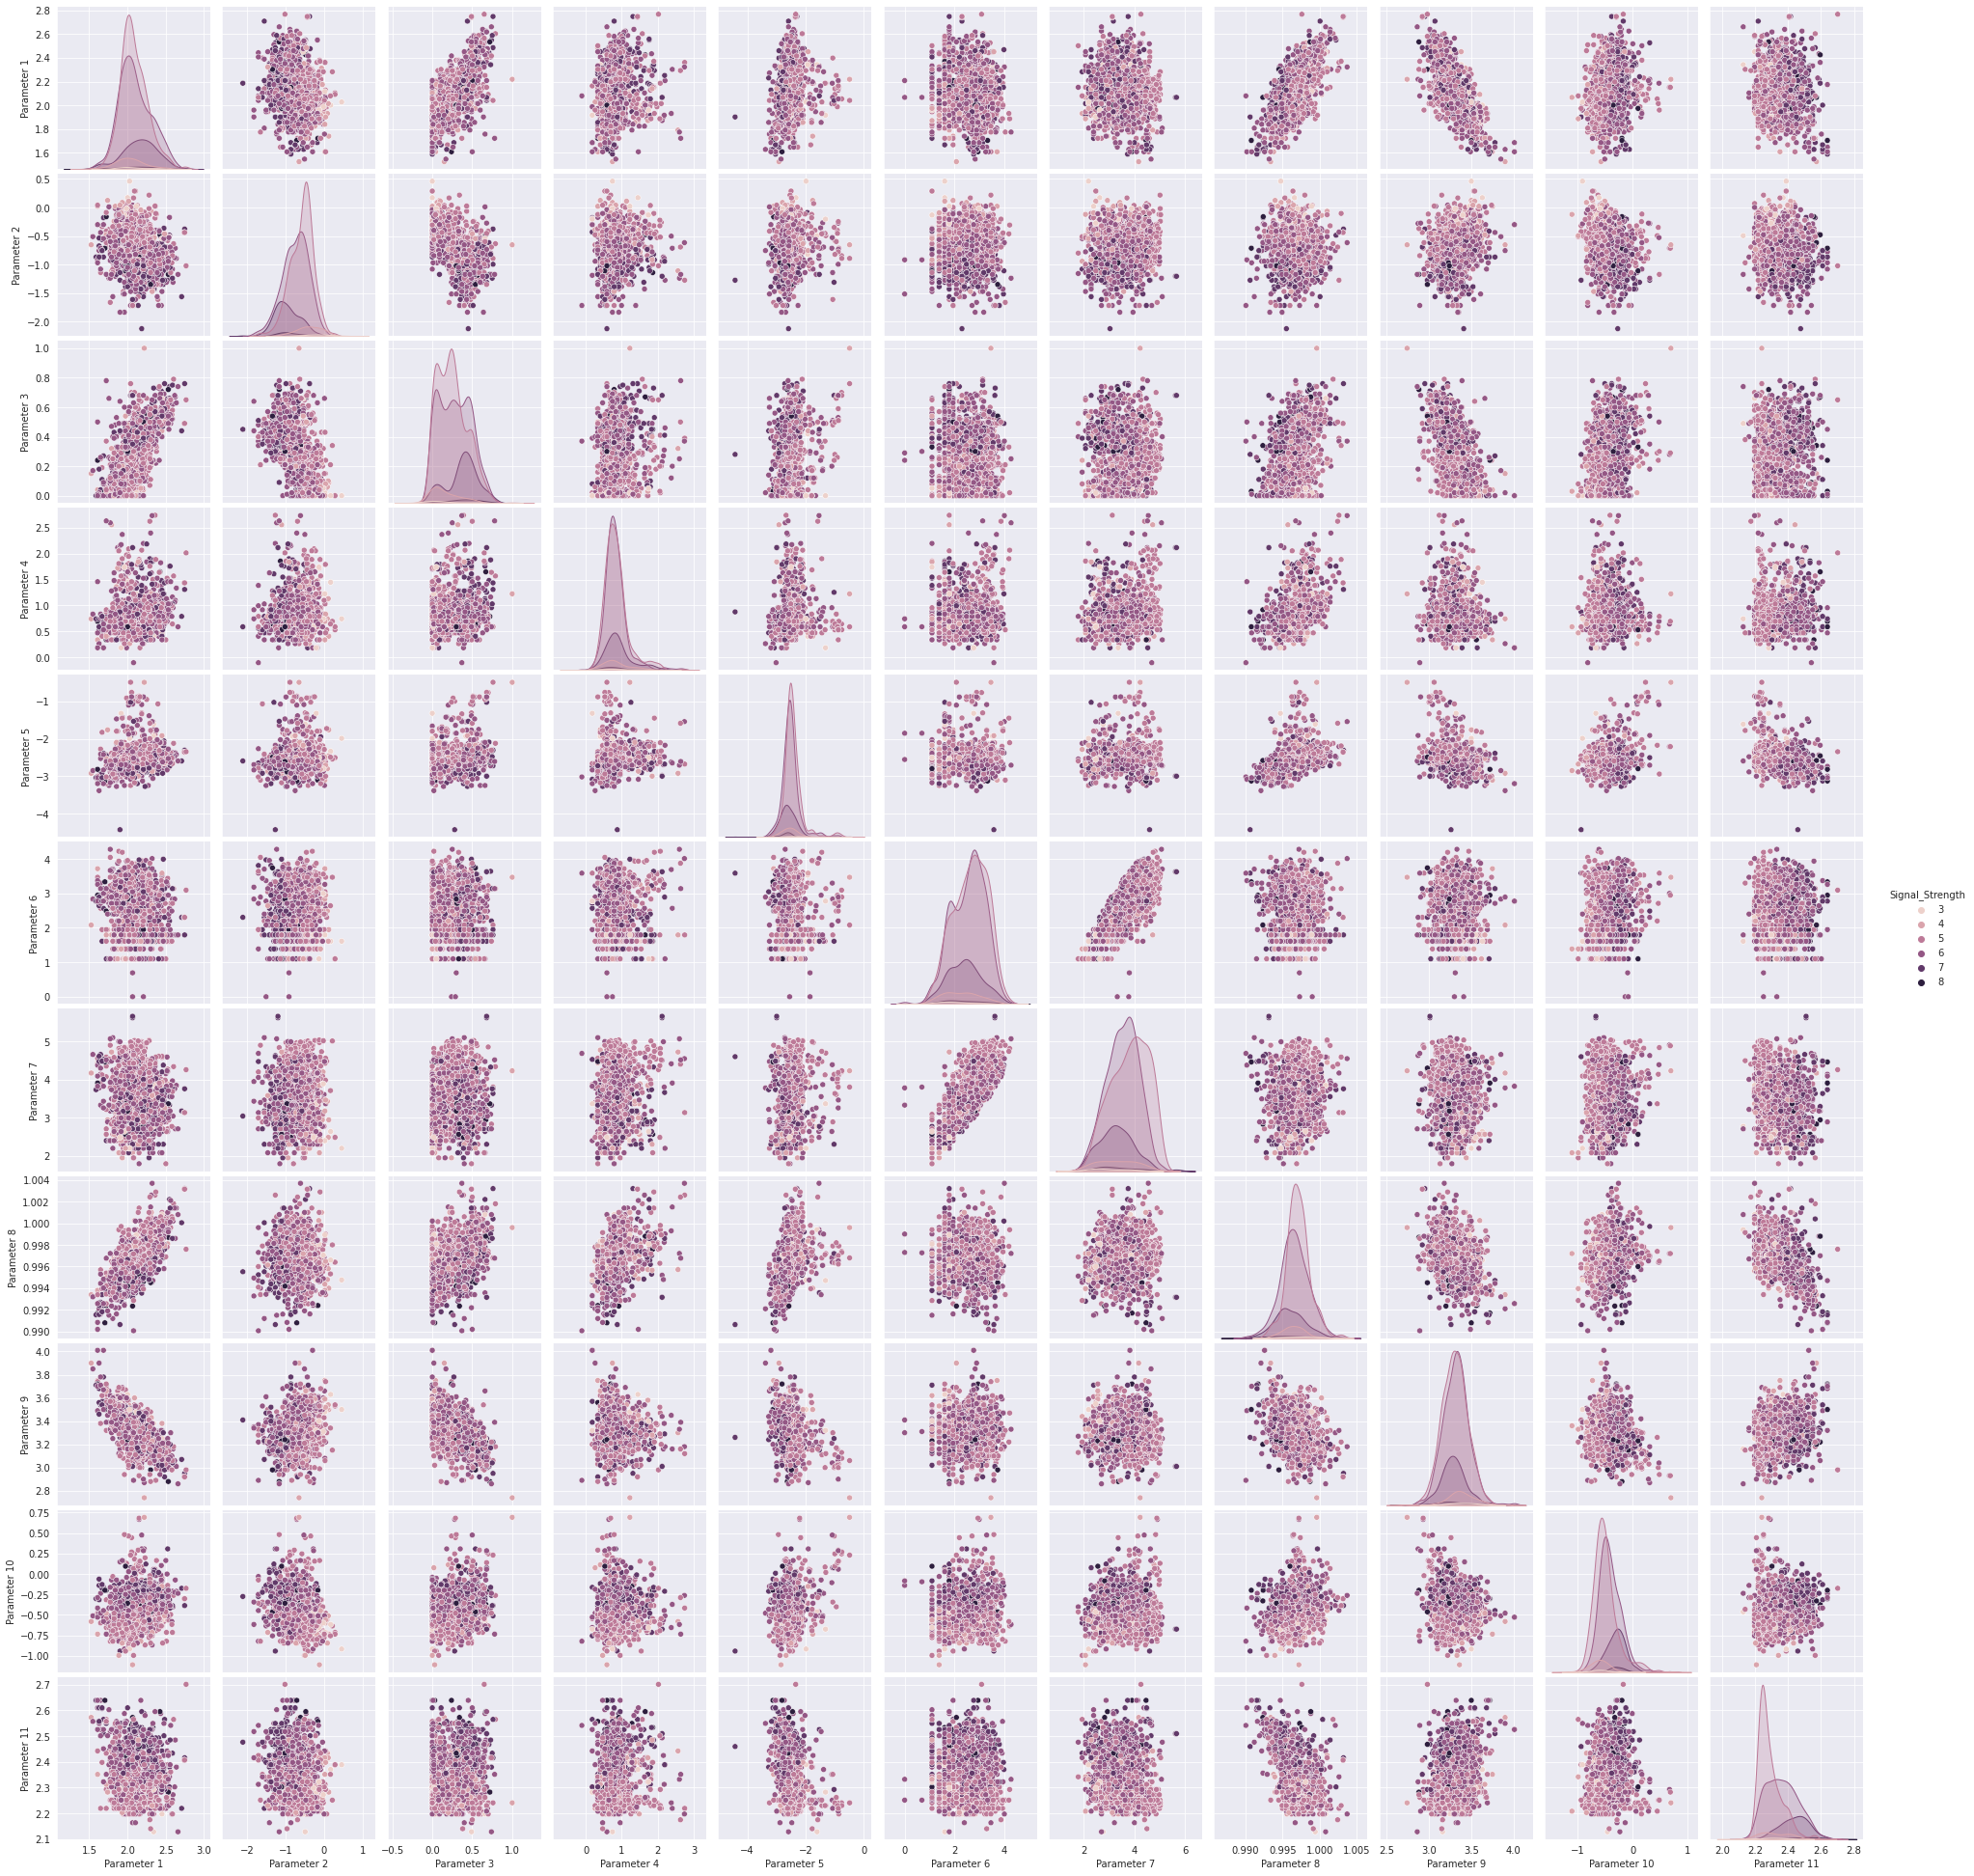

In [43]:
sns.pairplot(data_transformed, diag_kind='kde', hue='Signal_Strength')

In [44]:
data_transformed['Signal_Strength'] = data_transformed['Signal_Strength'].astype("category")

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_transformed['Signal_Strength'] = encoder.fit_transform(data_transformed['Signal_Strength'])

In [46]:
data_transformed['Signal_Strength'].value_counts()

2    577
3    535
4    167
1     53
5     17
0     10
Name: Signal_Strength, dtype: int64

In [47]:
train_dataset = data_transformed.sample(frac=0.75, random_state=12)
test_dataset = data_transformed.drop(train_dataset.index)

In [48]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Signal_Strength')
test_labels = test_features.pop('Signal_Strength')

#### Note:
Although there are only 6 categories present in the dataset for the signal strength but although in real life scenario, the Signal Strength can vary from 0 to 10 due to data limitations we have encoded the target column and we will not be able to achieve good accuracy as data size is small.

In [49]:
clf_model = tf.keras.Sequential()

clf_model.add(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
clf_model.add(tf.keras.layers.Dense(150, activation='tanh'))
clf_model.add(tf.keras.layers.Dropout(0.05))
clf_model.add(tf.keras.layers.Dense(250, activation='relu'))
 
clf_model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [50]:
clf_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 11)                44        
_________________________________________________________________
dense_10 (Dense)             (None, 150)               1800      
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 250)               37750     
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 1506      
Total params: 41,100
Trainable params: 41,078
Non-trainable params: 22
_________________________________________________________________


In [51]:
clf_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_clf_model.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', save_freq=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)

In [53]:
clf_history = clf_model.fit(train_features, train_labels, batch_size=52, epochs=50, validation_data=(test_features, test_labels), callbacks=[earlystopping, checkpoint])

Epoch 1/50
 1/20 [>.............................] - ETA: 6s - loss: 1.8434 - accuracy: 0.2500
Epoch 00001: loss improved from inf to 1.84338, saving model to best_clf_model.hdf5

Epoch 00001: loss improved from 1.84338 to 1.78484, saving model to best_clf_model.hdf5
 3/20 [===>..........................] - ETA: 0s - loss: 1.7821 - accuracy: 0.3237
Epoch 00001: loss improved from 1.78484 to 1.71804, saving model to best_clf_model.hdf5

Epoch 00001: loss improved from 1.71804 to 1.67685, saving model to best_clf_model.hdf5
 5/20 [======>.......................] - ETA: 0s - loss: 1.7349 - accuracy: 0.3592
Epoch 00001: loss improved from 1.67685 to 1.65127, saving model to best_clf_model.hdf5

Epoch 00001: loss improved from 1.65127 to 1.61746, saving model to best_clf_model.hdf5

Epoch 00001: loss improved from 1.61746 to 1.57229, saving model to best_clf_model.hdf5
 8/20 [===========>..................] - ETA: 0s - loss: 1.6748 - accuracy: 0.3905
Epoch 00001: loss improved from 1.57229 t

20/20 [==============================] - 0s 7ms/step - loss: 0.9242 - accuracy: 0.5977 - val_loss: 1.0526 - val_accuracy: 0.4647
Epoch 7/50
 1/20 [>.............................] - ETA: 0s - loss: 1.0691 - accuracy: 0.5192
Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss did not improve from 0.88985

Epoch 00007: loss improved from 0.88985 to 0.87750, saving model to best_clf_model.hdf5

Epoch 00007: loss did not improve from 0.87750

Epoch 00007: loss did not improve from 0.87750

Epoch 00007: loss did not improve from 0.87750

Epoch 00007: loss did not improve from 0.87750

Epoch 00007: los

17/20 [========================>.....] - ETA: 0s - loss: 0.8467 - accuracy: 0.6445
Epoch 00013: loss did not improve from 0.73724

Epoch 00013: loss did not improve from 0.73724

Epoch 00013: loss did not improve from 0.73724

Epoch 00013: loss did not improve from 0.73724
20/20 [==============================] - 0s 5ms/step - loss: 0.8529 - accuracy: 0.6411 - val_loss: 0.9928 - val_accuracy: 0.5441
Epoch 14/50
 1/20 [>.............................] - ETA: 0s - loss: 0.8476 - accuracy: 0.6346
Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did not improve from 0.73724

Epoch 00014: loss did 

20/20 [==============================] - 0s 4ms/step - loss: 0.8377 - accuracy: 0.6533 - val_loss: 0.9647 - val_accuracy: 0.5853
Epoch 21/50
 1/20 [>.............................] - ETA: 0s - loss: 0.6702 - accuracy: 0.6923
Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00021: loss did not improve from 0.65663

Epoch 00

20/20 [==============================] - 0s 4ms/step - loss: 0.8065 - accuracy: 0.6432 - val_loss: 0.9727 - val_accuracy: 0.6235
Epoch 28/50
 1/20 [>.............................] - ETA: 0s - loss: 0.8484 - accuracy: 0.6154
Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00028: loss did not improve from 0.63073

Epoch 00

20/20 [==============================] - 0s 4ms/step - loss: 0.7601 - accuracy: 0.6601 - val_loss: 0.9826 - val_accuracy: 0.6029


In [54]:
# Save the model
clf_model.save('classifier-1.h5')

In [55]:
# Pickle format
import pickle
with open('classifier-2.pkl', 'wb') as file:
    pickle.dump(clf_model.get_weights(), file)

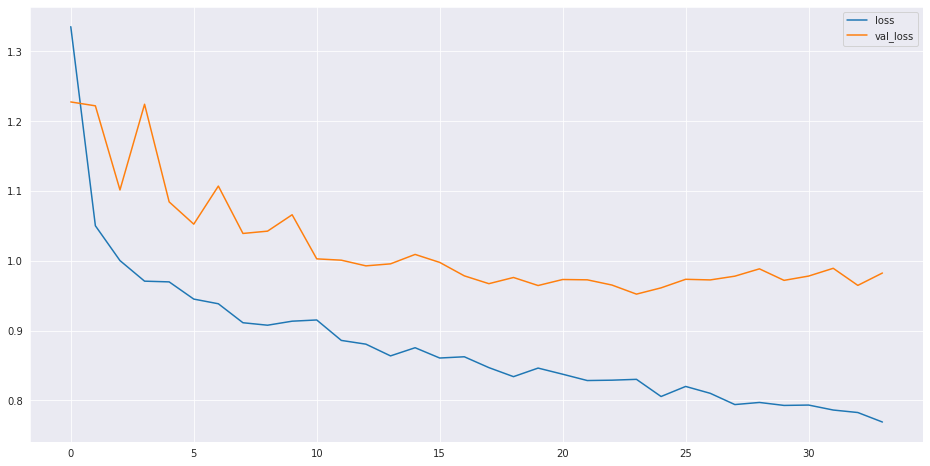

In [56]:
# Loss plot
plt.figure(figsize=(16, 8))
plt.plot(clf_history.epoch, clf_history.history['loss'])
plt.plot(clf_history.epoch, clf_history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

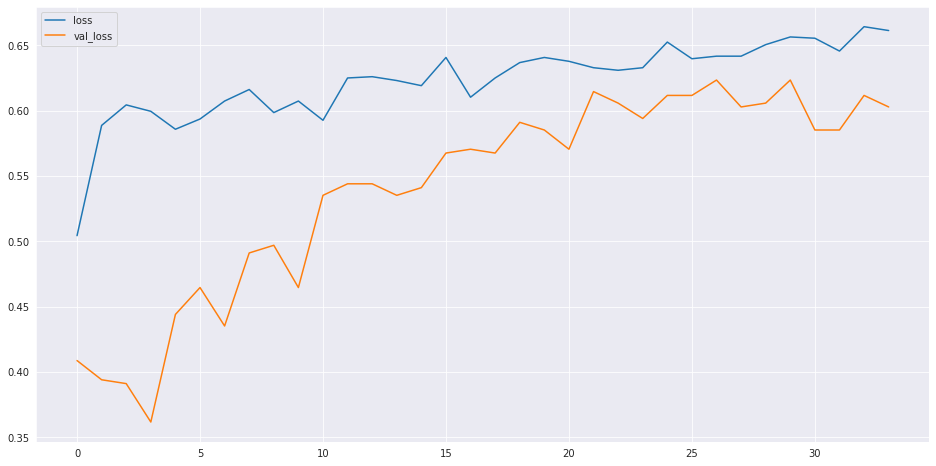

In [57]:
# Metric plot
plt.figure(figsize=(16, 8))
plt.plot(clf_history.epoch, clf_history.history['accuracy'])
plt.plot(clf_history.epoch, clf_history.history['val_accuracy'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [58]:
clf_pred_ = clf_model.predict_classes(test_features)

/home/abhishek/Workspace/jupyter-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


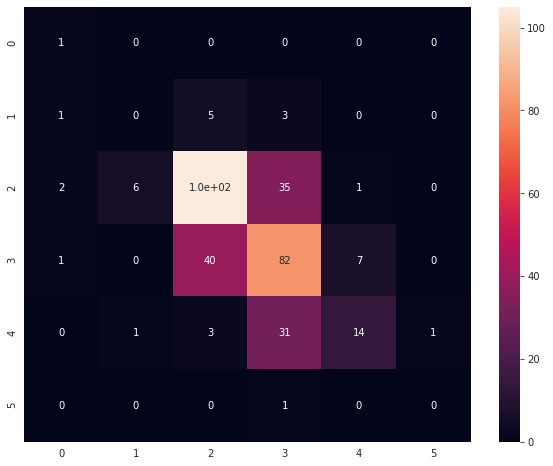

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(metrics.confusion_matrix(test_labels, clf_pred_), annot=True)
plt.show()

### Tuning the model

In [60]:
def create_model(layers, optimizer, loss, metrics, batch_size, epoch, callbacks):
    model = tf.keras.Sequential()
    for layer in layers:
        model.add(layer)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = model.fit(train_features, train_labels, batch_size=batch_size, epochs=epoch, validation_data=(test_features, test_labels), callbacks=callbacks)
    return history, model

In [61]:
layers = list()
layers.append(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
layers.append(tf.keras.layers.Dense(100, activation='relu'))
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.Dense(250, activation='relu'))
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.Dense(6, activation='softmax'))

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_clf_model-1.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', save_freq=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)
]

history_clf_1, clf_model_1 = create_model(layers, 'adam', 'sparse_categorical_crossentropy', 'accuracy', 100, 100, callbacks)

Epoch 1/100
 1/11 [=>............................] - ETA: 3s - loss: 1.8584 - accuracy: 0.1000
Epoch 00001: loss improved from inf to 1.85836, saving model to best_clf_model-1.hdf5

Epoch 00001: loss improved from 1.85836 to 1.84433, saving model to best_clf_model-1.hdf5

Epoch 00001: loss improved from 1.84433 to 1.82213, saving model to best_clf_model-1.hdf5
 4/11 [=========>....................] - ETA: 0s - loss: 1.8295 - accuracy: 0.1410
Epoch 00001: loss improved from 1.82213 to 1.79335, saving model to best_clf_model-1.hdf5

Epoch 00001: loss improved from 1.79335 to 1.75367, saving model to best_clf_model-1.hdf5

Epoch 00001: loss improved from 1.75367 to 1.72128, saving model to best_clf_model-1.hdf5
 7/11 [==================>...........] - ETA: 0s - loss: 1.7844 - accuracy: 0.1953
Epoch 00001: loss improved from 1.72128 to 1.69787, saving model to best_clf_model-1.hdf5

Epoch 00001: loss improved from 1.69787 to 1.67158, saving model to best_clf_model-1.hdf5
 9/11 [===========

11/11 [==============================] - 0s 7ms/step - loss: 1.0276 - accuracy: 0.5744 - val_loss: 1.2463 - val_accuracy: 0.3794
Epoch 9/100
 1/11 [=>............................] - ETA: 0s - loss: 0.9800 - accuracy: 0.6100
Epoch 00009: loss improved from 0.98639 to 0.97999, saving model to best_clf_model-1.hdf5

Epoch 00009: loss did not improve from 0.97999

Epoch 00009: loss did not improve from 0.97999

Epoch 00009: loss did not improve from 0.97999

Epoch 00009: loss did not improve from 0.97999

Epoch 00009: loss did not improve from 0.97999

Epoch 00009: loss did not improve from 0.97999

Epoch 00009: loss did not improve from 0.97999

Epoch 00009: loss did not improve from 0.97999

Epoch 00009: loss did not improve from 0.97999

Epoch 00009: loss did not improve from 0.97999
11/11 [==============================] - 0s 9ms/step - loss: 1.0179 - accuracy: 0.5910 - val_loss: 1.1951 - val_accuracy: 0.3765
Epoch 10/100
 1/11 [=>............................] - ETA: 0s - loss: 0.9310 

 1/11 [=>............................] - ETA: 0s - loss: 0.8080 - accuracy: 0.6300
Epoch 00019: loss improved from 0.88006 to 0.80796, saving model to best_clf_model-1.hdf5

Epoch 00019: loss did not improve from 0.80796

Epoch 00019: loss did not improve from 0.80796

Epoch 00019: loss did not improve from 0.80796

Epoch 00019: loss did not improve from 0.80796

Epoch 00019: loss did not improve from 0.80796

Epoch 00019: loss did not improve from 0.80796

Epoch 00019: loss did not improve from 0.80796
 9/11 [=======================>......] - ETA: 0s - loss: 0.8906 - accuracy: 0.6064
Epoch 00019: loss did not improve from 0.80796

Epoch 00019: loss did not improve from 0.80796

Epoch 00019: loss did not improve from 0.80796
11/11 [==============================] - 0s 11ms/step - loss: 0.9022 - accuracy: 0.6045 - val_loss: 1.0448 - val_accuracy: 0.4588
Epoch 20/100
 1/11 [=>............................] - ETA: 0s - loss: 0.9544 - accuracy: 0.6500
Epoch 00020: loss did not improve from 

11/11 [==============================] - 0s 7ms/step - loss: 0.9085 - accuracy: 0.6162 - val_loss: 0.9768 - val_accuracy: 0.5706
Epoch 30/100
 1/11 [=>............................] - ETA: 0s - loss: 0.9364 - accuracy: 0.5600
Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684

Epoch 00030: loss did not improve from 0.79684
11/11 [==============================] - 0s 7ms/step - loss: 0.8964 - accuracy: 0.6138 - val_loss: 0.9916 - val_accuracy: 0.5559
Epoch 31/100
 1/11 [=>............................] - ETA: 0s - loss: 0.9015 - accuracy: 0.5700
Epoch 00031: loss did n


Epoch 00040: loss did not improve from 0.75600

Epoch 00040: loss did not improve from 0.75600
11/11 [==============================] - 0s 9ms/step - loss: 0.8428 - accuracy: 0.6331 - val_loss: 0.9476 - val_accuracy: 0.5912
Epoch 41/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8619 - accuracy: 0.5800
Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600

Epoch 00041: loss did not improve from 0.75600
11/11 [==============================] - 0s 8ms/step - loss: 0.8767 - accuracy: 0.6142 - val_loss: 0.9472 - val_accuracy: 0.6029
Epoch 42/100
 1/11 [=>.

11/11 [==============================] - 0s 7ms/step - loss: 0.8253 - accuracy: 0.6408 - val_loss: 0.9452 - val_accuracy: 0.6000
Epoch 52/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8345 - accuracy: 0.6600
Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600

Epoch 00052: loss did not improve from 0.75600
11/11 [==============================] - 0s 8ms/step - loss: 0.8290 - accuracy: 0.6466 - val_loss: 0.9477 - val_accuracy: 0.6000
Epoch 53/100
 1/11 [=>............................] - ETA: 0s - loss: 0.8291 - accuracy: 0.6200
Epoch 00053: loss did n

In [62]:
layers = list()
layers.append(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
layers.append(tf.keras.layers.Dense(100, activation='relu'))
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.LeakyReLU())
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.Dense(6, activation='softmax'))

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_clf_model-2.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', save_freq=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)
]

history_clf_2, clf_model_2 = create_model(layers, 'adagrad', 'sparse_categorical_crossentropy', 'accuracy', 100, 100, callbacks)

Epoch 1/100
 1/11 [=>............................] - ETA: 2s - loss: 2.0601 - accuracy: 0.1000
Epoch 00001: loss improved from inf to 2.06015, saving model to best_clf_model-2.hdf5

Epoch 00001: loss improved from 2.06015 to 2.01055, saving model to best_clf_model-2.hdf5

Epoch 00001: loss improved from 2.01055 to 2.00623, saving model to best_clf_model-2.hdf5

Epoch 00001: loss improved from 2.00623 to 2.00192, saving model to best_clf_model-2.hdf5
 5/11 [============>.................] - ETA: 0s - loss: 2.0170 - accuracy: 0.0969
Epoch 00001: loss did not improve from 2.00192

Epoch 00001: loss did not improve from 2.00192

Epoch 00001: loss improved from 2.00192 to 1.99775, saving model to best_clf_model-2.hdf5

Epoch 00001: loss did not improve from 1.99775

Epoch 00001: loss improved from 1.99775 to 1.99705, saving model to best_clf_model-2.hdf5

Epoch 00001: loss improved from 1.99705 to 1.99470, saving model to best_clf_model-2.hdf5
11/11 [==============================] - ETA: 0

Epoch 11/100
 1/11 [=>............................] - ETA: 0s - loss: 1.7339 - accuracy: 0.2600
Epoch 00011: loss improved from 1.78401 to 1.73388, saving model to best_clf_model-2.hdf5

Epoch 00011: loss did not improve from 1.73388

Epoch 00011: loss did not improve from 1.73388

Epoch 00011: loss did not improve from 1.73388

Epoch 00011: loss did not improve from 1.73388

Epoch 00011: loss did not improve from 1.73388

Epoch 00011: loss did not improve from 1.73388

Epoch 00011: loss did not improve from 1.73388

Epoch 00011: loss did not improve from 1.73388

Epoch 00011: loss did not improve from 1.73388

Epoch 00011: loss did not improve from 1.73388
11/11 [==============================] - 0s 9ms/step - loss: 1.7794 - accuracy: 0.2139 - val_loss: 1.6754 - val_accuracy: 0.3353
Epoch 12/100
 1/11 [=>............................] - ETA: 0s - loss: 1.8282 - accuracy: 0.1500
Epoch 00012: loss did not improve from 1.73388

Epoch 00012: loss did not improve from 1.73388

Epoch 00012: 

Epoch 21/100
 1/11 [=>............................] - ETA: 0s - loss: 1.7255 - accuracy: 0.3300
Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449

Epoch 00021: loss did not improve from 1.65449
11/11 [==============================] - 0s 7ms/step - loss: 1.6788 - accuracy: 0.2960 - val_loss: 1.5871 - val_accuracy: 0.4118
Epoch 22/100
 1/11 [=>............................] - ETA: 0s - loss: 1.7413 - accuracy: 0.2600
Epoch 00022: loss did not improve from 1.65449

Epoch 00022: loss did not improve from 1.65449

Epoch 00022: loss did not improve from 1.65449

Epoch 00

11/11 [==============================] - 0s 11ms/step - loss: 1.5754 - accuracy: 0.3956 - val_loss: 1.5240 - val_accuracy: 0.4588
Epoch 32/100
 1/11 [=>............................] - ETA: 0s - loss: 1.5972 - accuracy: 0.3600
Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419

Epoch 00032: loss did not improve from 1.55419
11/11 [==============================] - 0s 10ms/step - loss: 1.5740 - accuracy: 0.3933 - val_loss: 1.5177 - val_accuracy: 0.4647
Epoch 33/100
 1/11 [=>............................] - ETA: 0s - loss: 1.5913 - accuracy: 0.3800
Epoch 00033: loss did

11/11 [==============================] - 0s 7ms/step - loss: 1.5173 - accuracy: 0.3982 - val_loss: 1.4568 - val_accuracy: 0.5000
Epoch 43/100
 1/11 [=>............................] - ETA: 0s - loss: 1.4583 - accuracy: 0.5300
Epoch 00043: loss improved from 1.46759 to 1.45830, saving model to best_clf_model-2.hdf5

Epoch 00043: loss did not improve from 1.45830

Epoch 00043: loss did not improve from 1.45830

Epoch 00043: loss did not improve from 1.45830

Epoch 00043: loss did not improve from 1.45830

Epoch 00043: loss did not improve from 1.45830

Epoch 00043: loss did not improve from 1.45830

Epoch 00043: loss did not improve from 1.45830

Epoch 00043: loss did not improve from 1.45830

Epoch 00043: loss did not improve from 1.45830

Epoch 00043: loss did not improve from 1.45830
11/11 [==============================] - 0s 8ms/step - loss: 1.4956 - accuracy: 0.4459 - val_loss: 1.4509 - val_accuracy: 0.4971
Epoch 44/100
 1/11 [=>............................] - ETA: 0s - loss: 1.5665

 5/11 [============>.................] - ETA: 0s - loss: 1.4560 - accuracy: 0.4539
Epoch 00053: loss did not improve from 1.43329

Epoch 00053: loss did not improve from 1.43329

Epoch 00053: loss did not improve from 1.43329

Epoch 00053: loss did not improve from 1.43329

Epoch 00053: loss did not improve from 1.43329

Epoch 00053: loss did not improve from 1.43329

Epoch 00053: loss did not improve from 1.43329
11/11 [==============================] - 0s 14ms/step - loss: 1.4549 - accuracy: 0.4587 - val_loss: 1.3949 - val_accuracy: 0.5588
Epoch 54/100
 1/11 [=>............................] - ETA: 0s - loss: 1.4634 - accuracy: 0.4500
Epoch 00054: loss did not improve from 1.43329

Epoch 00054: loss did not improve from 1.43329

Epoch 00054: loss did not improve from 1.43329

Epoch 00054: loss did not improve from 1.43329

Epoch 00054: loss did not improve from 1.43329

Epoch 00054: loss did not improve from 1.43329

Epoch 00054: loss did not improve from 1.43329

Epoch 00054: loss di

11/11 [==============================] - 0s 9ms/step - loss: 1.4026 - accuracy: 0.4845 - val_loss: 1.3489 - val_accuracy: 0.5647
Epoch 64/100
 1/11 [=>............................] - ETA: 0s - loss: 1.3853 - accuracy: 0.4400
Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681

Epoch 00064: loss did not improve from 1.33681
11/11 [==============================] - 0s 11ms/step - loss: 1.3997 - accuracy: 0.4921 - val_loss: 1.3448 - val_accuracy: 0.5647
Epoch 65/100
 1/11 [=>............................] - ETA: 0s - loss: 1.3962 - accuracy: 0.4500
Epoch 00065: loss did 

11/11 [==============================] - 0s 5ms/step - loss: 1.3708 - accuracy: 0.5150 - val_loss: 1.3075 - val_accuracy: 0.5765
Epoch 75/100
 1/11 [=>............................] - ETA: 0s - loss: 1.3527 - accuracy: 0.5600
Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107

Epoch 00075: loss did not improve from 1.32107
11/11 [==============================] - 0s 4ms/step - loss: 1.3737 - accuracy: 0.5074 - val_loss: 1.3041 - val_accuracy: 0.5765
Epoch 76/100
 1/11 [=>............................] - ETA: 0s - loss: 1.4563 - accuracy: 0.4100
Epoch 00076: loss did n


Epoch 00085: loss did not improve from 1.29156

Epoch 00085: loss did not improve from 1.29156

Epoch 00085: loss did not improve from 1.29156

Epoch 00085: loss did not improve from 1.29156

Epoch 00085: loss did not improve from 1.29156
11/11 [==============================] - 0s 8ms/step - loss: 1.3427 - accuracy: 0.5130 - val_loss: 1.2731 - val_accuracy: 0.5765
Epoch 86/100
 1/11 [=>............................] - ETA: 0s - loss: 1.3845 - accuracy: 0.4700
Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156

Epoch 00086: loss did not improve from 1.29156
11/11 [=


Epoch 00096: loss did not improve from 1.28656

Epoch 00096: loss did not improve from 1.28656

Epoch 00096: loss did not improve from 1.28656

Epoch 00096: loss did not improve from 1.28656

Epoch 00096: loss did not improve from 1.28656

Epoch 00096: loss did not improve from 1.28656

Epoch 00096: loss did not improve from 1.28656
11/11 [==============================] - 0s 10ms/step - loss: 1.3442 - accuracy: 0.4999 - val_loss: 1.2441 - val_accuracy: 0.5676
Epoch 97/100
 1/11 [=>............................] - ETA: 0s - loss: 1.3701 - accuracy: 0.4700
Epoch 00097: loss did not improve from 1.28656

Epoch 00097: loss did not improve from 1.28656

Epoch 00097: loss did not improve from 1.28656

Epoch 00097: loss did not improve from 1.28656

Epoch 00097: loss did not improve from 1.28656

Epoch 00097: loss did not improve from 1.28656

Epoch 00097: loss did not improve from 1.28656

Epoch 00097: loss did not improve from 1.28656

Epoch 00097: loss did not improve from 1.28656

Epoch 

In [63]:
layers = list()
layers.append(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
layers.append(tf.keras.layers.Dense(100, activation='relu'))
layers.append(tf.keras.layers.Dropout(0.25))
layers.append(tf.keras.layers.LeakyReLU(100))
layers.append(tf.keras.layers.Dropout(0.50))
layers.append(tf.keras.layers.Dense(6, activation='softmax'))

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_clf_model-3.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', save_freq=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)
]

history_clf_3, clf_model_3 = create_model(layers, 'rmsprop', 'hinge', 'accuracy', 50, 100, callbacks)

Epoch 1/100
 1/21 [>.............................] - ETA: 13s - loss: 0.5716 - accuracy: 0.2200
Epoch 00001: loss improved from inf to 0.57159, saving model to best_clf_model-3.hdf5

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

Epoch 00001: loss did not improve from 0.57159

E

Epoch 8/100
 1/21 [>.............................] - ETA: 0s - loss: 0.5323 - accuracy: 0.0800
Epoch 00008: loss improved from 0.53687 to 0.53226, saving model to best_clf_model-3.hdf5

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

Epoch 00008: loss did not improve from 0.53226

21/21 [==============================] - 0s 4ms/step - loss: 0.5619 - accuracy: 0.1374 - val_loss: 0.5578 - val_accuracy: 0.0912
Epoch 15/100
 1/21 [>.............................] - ETA: 0s - loss: 0.5667 - accuracy: 0.2000
Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 00015: loss did not improve from 0.53226

Epoch 0

#### Observations:
1. We have used Adam as optimizer and Accuracy for validation metrics.
2. As we can see, the accuracy and loss for training and testing is not good enough to put model in production.
3. In the confusion matrix, it can be observed that classes having higher data is coming with high correct predictions while the classes having low data is performing poorly.
4. Even after several iterations, the Accuracy is not improving based on which we can conclude the data used for training a neural network is very less.

 ## GUI Model Training

In [65]:
app = tk.Tk()
app.title('Neural Networks GUI')
app.geometry('700x360')

def data_split():
    train_dataset = data_df.sample(frac=0.75, random_state=12)
    test_dataset = data_df.drop(train_dataset.index)
    
    train_features = train_dataset.copy()
    test_features = test_dataset.copy()
    
    train_features = train_dataset.copy()
    test_features = test_dataset.copy()
    train_labels = train_features.pop('Signal_Strength')
    test_labels = test_features.pop('Signal_Strength')
    return train_features, train_labels, test_features, test_labels

# -------- Row 1 ------------
## Label
input_label = Label(text='Step 1: File Name')
input_label.grid(row=1, column=1, sticky=tk.W)

## Input
input_file_var = tk.StringVar()
input_file_box = Entry(app, width=20, text=input_file_var)
input_file_box.grid(row=1, column=2)

def import_data():
    global data_df
    try:
        data_df = pd.read_csv(input_file_var.get())
        import_confirm = 'Data Imported Successfully.'
    except Exception as e:
        import_confirm = 'File Not Found.'
    import_confirmbox = Entry(app, width=25)
    import_confirmbox.grid(row=1, column=4)
    import_confirmbox.insert(1, import_confirm)
    import_confirmbox.configure(state='disabled')

## Button
import_button = Button(app, text='Import Data', width=16, command=import_data)
import_button.grid(row=1, column=3, sticky=tk.W)

# -------- Row 2 ------------
## Label
target_label = Label(text='Step 2: Target Column')
target_label.grid(row=2, column=1, sticky=tk.W)

## Input
target_column_var = tk.StringVar()
target_column_box = Entry(app, width=20, text=target_column_var)
target_column_box.grid(row=2, column=2)

def check_target_column():
    if target_column_var.get() in data_df.columns:
        import_confirm = 'Target Column Found'
    else:
        import_confirm = 'Target Column Not Found'
    import_confirmbox = Entry(app, width=25)
    import_confirmbox.grid(row=2, column=4)
    import_confirmbox.insert(1, import_confirm)
    import_confirmbox.configure(state='disabled')
        
## Button
target_button = Button(app, text='Import Target', width=16, command=check_target_column)
target_button.grid(row=2, column=3, sticky=tk.W)

# -------- Row 3 ------------
reg_label = Label(text='Step 3: Neural Network Regressor')
reg_label.grid(row=3, column=1, sticky=tk.W)

# -------- Row 4 ------------
reg_train_label = Label(text='Regression', anchor='e')
reg_train_label.grid(row=4, column=1)

def train_regression():
    global reg_model
    train_features, train_labels, test_features, test_labels = data_split()
    reg_model = tf.keras.Sequential()

    reg_model.add(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
    reg_model.add(tf.keras.layers.Dense(100, activation='relu'))
    reg_model.add(tf.keras.layers.Dense(250, activation='relu'))

    reg_model.add(tf.keras.layers.Dense(1, activation='linear'))
    
    reg_model.compile(optimizer='adam', loss=tf.keras.losses.mean_absolute_error, metrics=tf.keras.metrics.mean_squared_error)
    earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)
    reg_model.fit(train_features, train_labels, batch_size=50, epochs=50, validation_data=(test_features, test_labels), callbacks=[earlystopping])
    
    label = 'Network Trained'
    entry = Entry(app, width=25)
    entry.grid(row=4, column=3)
    entry.insert(1, label)
    entry.configure(state='disabled')

reg_train_button = Button(app, text='Train', width=16, command=train_regression)
reg_train_button.grid(row=4, column=2, sticky=tk.W)

# -------- Row 5 ------------
reg_save_label = Label(text='Pickle', anchor='e')
reg_save_label.grid(row=5, column=1)

def save_reg_model():
    try:
        reg_model.save('Regression_Model.h5')
        label = 'Model saved to disk'
    except Exception as e:
        label = 'First Train Regression Model'
        
    entry = Entry(app, width=25)
    entry.grid(row=5, column=3)
    entry.insert(1, label)
    entry.configure(state='disabled')
    
reg_run_btn = Button(app, text='Run', width=16, command=save_reg_model)
reg_run_btn.grid(row=5, column=2, sticky=tk.W)

# -------- Row 6 ------------
clf_label = Label(text='Step 4: Neural Network Classifier')
clf_label.grid(row=6, column=1, sticky=tk.W)

# -------- Row 7 ------------
clf_train_label = Label(text='Classifier', anchor='e')
clf_train_label.grid(row=7, column=1)

def train_classifier():
    global clf_model
    train_features, train_labels, test_features, test_labels = data_split()
    clf_model = tf.keras.Sequential()

    clf_model.add(tf.keras.layers.BatchNormalization(input_shape=(train_features.shape[1],)))
    clf_model.add(tf.keras.layers.Dense(150, activation='tanh'))
    clf_model.add(tf.keras.layers.Dropout(0.05))
    clf_model.add(tf.keras.layers.Dense(250, activation='relu'))

    clf_model.add(tf.keras.layers.Dense(9, activation='softmax'))
    
    clf_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto', restore_best_weights=True, patience=10)
    clf_model.fit(train_features, train_labels, batch_size=52, epochs=50, validation_data=(test_features, test_labels), callbacks=[earlystopping])
    
    label = 'Network Trained'
    entry = Entry(app, width=25)
    entry.grid(row=7, column=3)
    entry.insert(1, label)
    entry.configure(state='disabled')
    
clf_train_btn = Button(app, text='Train', width=16, command=train_classifier)
clf_train_btn.grid(row=7, column=2, sticky=tk.W)

# -------- Row 8 ------------
clf_run_label = Label(text='Pickle', anchor='e')
clf_run_label.grid(row=8, column=1)

def save_clf_model():
    try:
        clf_model.save('Classification_Model.h5')
        label = 'Model saved to disk'
    except Exception as e:
        label = 'First Train Classification Model'
        
    entry = Entry(app, width=25)
    entry.grid(row=8, column=3)
    entry.insert(1, label)
    entry.configure(state='disabled')
    
clf_run_btn = Button(app, text='Run', width=16, command=save_clf_model)
clf_run_btn.grid(row=8, column=2, sticky=tk.W)

In [66]:
app.mainloop()